In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [13]:
df = pd.read_csv("ad.csv")

In [15]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


**DATA PREPROCESSING** 

In [17]:
df = df.drop(['id', 'full_name'], axis=1)
print(df.head())

    age      gender device_type ad_position browsing_history time_of_day  \
0  22.0         NaN     Desktop         Top         Shopping   Afternoon   
1   NaN        Male     Desktop         Top              NaN         NaN   
2  41.0  Non-Binary         NaN        Side        Education       Night   
3  34.0        Male         NaN         NaN    Entertainment     Evening   
4  39.0  Non-Binary         NaN         NaN     Social Media     Morning   

   click  
0      1  
1      1  
2      1  
3      1  
4      0  


In [19]:
df['age'] = df['age'].fillna(df['age'].median())
print(df.head())

    age      gender device_type ad_position browsing_history time_of_day  \
0  22.0         NaN     Desktop         Top         Shopping   Afternoon   
1  39.5        Male     Desktop         Top              NaN         NaN   
2  41.0  Non-Binary         NaN        Side        Education       Night   
3  34.0        Male         NaN         NaN    Entertainment     Evening   
4  39.0  Non-Binary         NaN         NaN     Social Media     Morning   

   click  
0      1  
1      1  
2      1  
3      1  
4      0  


In [21]:
for column in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
  df[column] = df[column].fillna(df[column].mode()[0])

print(df.head())

    age      gender device_type ad_position browsing_history time_of_day  \
0  22.0      Female     Desktop         Top         Shopping   Afternoon   
1  39.5        Male     Desktop         Top    Entertainment     Morning   
2  41.0  Non-Binary     Desktop        Side        Education       Night   
3  34.0        Male     Desktop      Bottom    Entertainment     Evening   
4  39.0  Non-Binary     Desktop      Bottom     Social Media     Morning   

   click  
0      1  
1      1  
2      1  
3      1  
4      0  


**DATA VISUALIZATION**

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

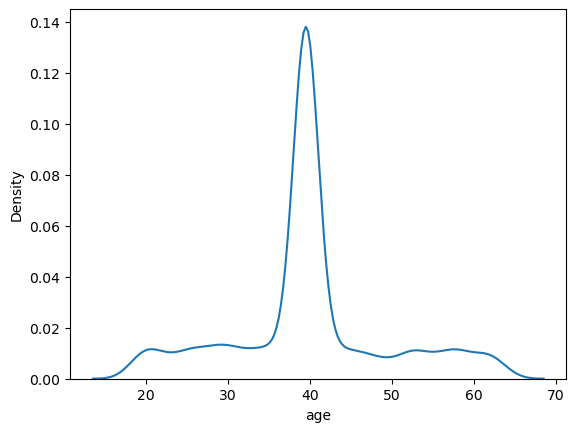

In [28]:
sns.kdeplot(df['age'])
plt.show()

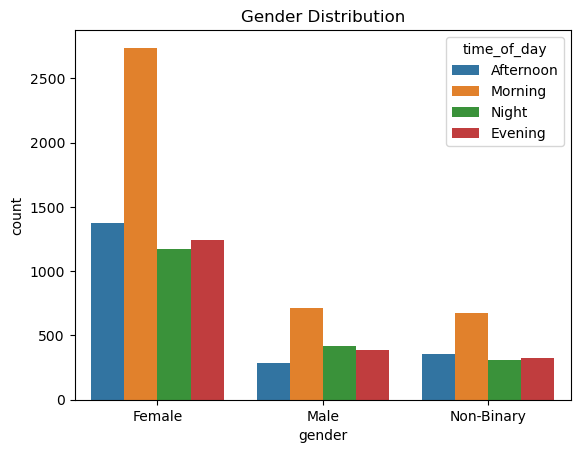

In [44]:
sns.countplot(x='gender', data=df,hue = 'time_of_day')
plt.title('Gender Distribution')
plt.show()

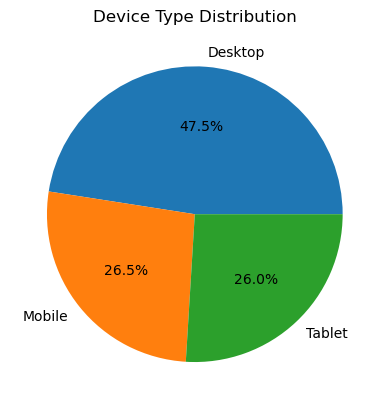

In [40]:
device_counts = df['device_type'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%')
plt.title('Device Type Distribution')
plt.show()

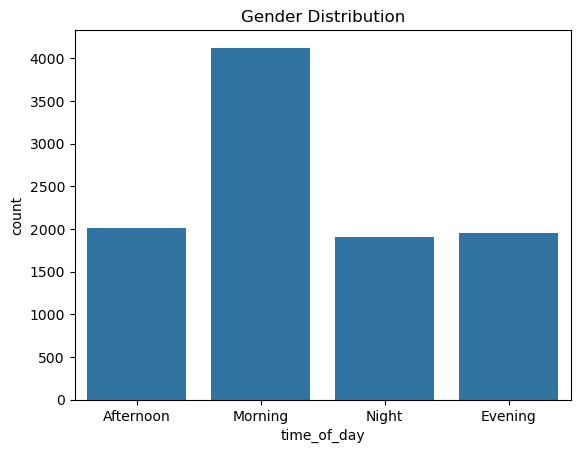

In [50]:
sns.countplot(x='time_of_day', data=df)
plt.title('Gender Distribution')
plt.show()

**MODEL DEVELOPMENT**

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [60]:
le = LabelEncoder()
for column in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
  df[column] = le.fit_transform(df[column])
print(df.head())

    age  gender  device_type  ad_position  browsing_history  time_of_day  \
0  22.0       0            0            2                 3            0   
1  39.5       1            0            2                 1            2   
2  41.0       2            0            1                 0            3   
3  34.0       1            0            0                 1            1   
4  39.0       2            0            0                 4            2   

   click  
0      1  
1      1  
2      1  
3      1  
4      0  


In [79]:
X = df.drop('click', axis=1)
y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666,stratify = y)

**MODEL BUILDING**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65


**TRYING DIFFERENT MODELS**

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [89]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.7475
Random Forest Accuracy: 0.7385
SVM Accuracy: 0.65
KNN Accuracy: 0.682


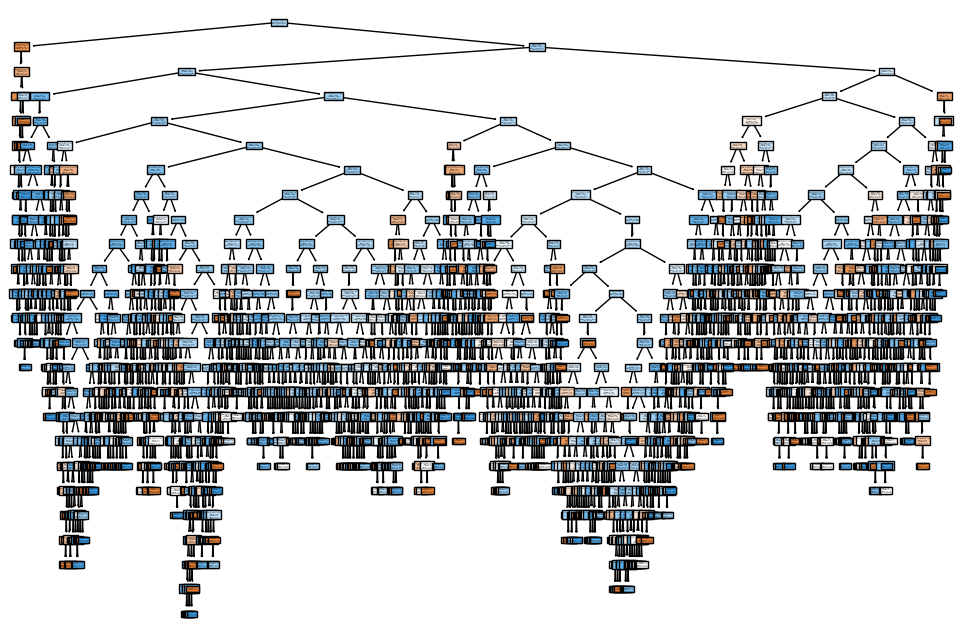

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Click', 'Click'], filled=True)
plt.show()

In [97]:
import pickle

filename = 'dt.sav'
pickle.dump(dt_model, open(filename, 'wb'))